# Chocolate bars analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('chocolate.csv', index_col=0)
df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [2]:
df['cocoa_percent'].isnull().sum()

0

In [3]:
df.shape

(2224, 20)

In [4]:
df.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [5]:
df.isna().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [6]:
mean_rating = df['rating'].mean()
mean_rating

3.198561151079137

In [7]:
median_rating = df['rating'].median()
median_rating

3.25

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Attempt to answer a question:
1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 

In [8]:
avg_rating_by_bean_origin = (df
                             .groupby('country_of_bean_origin')
                             .agg(
                                 rating=('rating', np.mean),
                                 count=('rating', np.count_nonzero)
                             )
                             .sort_values('rating', ascending=False)
                            )
avg_rating_by_bean_origin.head()

,rating,count
country_of_bean_origin,,
Sao tome & principe,3.500000,1.0
Solomon islands,3.450000,10.0
Congo,3.318182,11.0
Thailand,3.300000,5.0
Cuba,3.291667,12.0


In [9]:
avg_rating_by_bean_origin.describe()

,rating,count
count,62.000000,62.000000
mean,3.121221,35.870968
std,0.171869,56.341897
min,2.750000,1.000000
25%,3.042411,3.000000
50%,3.159007,11.500000
75%,3.250000,44.250000
max,3.500000,238.000000


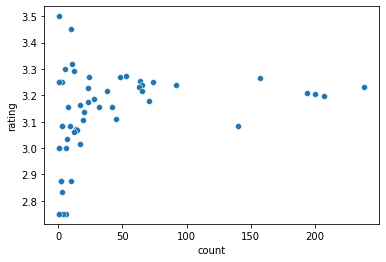

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='count', y='rating', data=avg_rating_by_bean_origin)
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(avg_rating_by_bean_origin[['count']])
train_y = np.asanyarray(avg_rating_by_bean_origin[['rating']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00088827]]
Intercept:  [3.08935772]


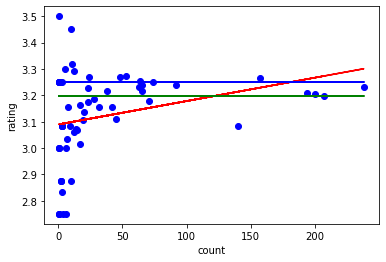

In [12]:
plt.scatter(train_x, train_y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.plot(train_x, [mean_rating for _ in train_x], '-g')
plt.plot(train_x, [median_rating for _ in train_x], '-b')
plt.xlabel("count")
plt.ylabel("rating")
plt.show()

It seems that the cacao origin does not interfere with quality (rating) of the bar. Maybe the origin of bar-manufacturer will have impact on the taste? Let's check it.

In [13]:
avg_rating_by_manufacturer = (df
                             .groupby('company')
                             .agg(
                                 rating=('rating', np.mean),
                                 count=('rating', np.count_nonzero)
                             )
                             .sort_values('rating', ascending=False)
                            )
avg_rating_by_manufacturer.head()

,rating,count
company,,
Heirloom Cacao Preservation (Zokoko),3.875000,2.0
Ocelot,3.875000,2.0
Matale,3.812500,4.0
Patric,3.791667,6.0
Idilio (Felchlin),3.775000,10.0


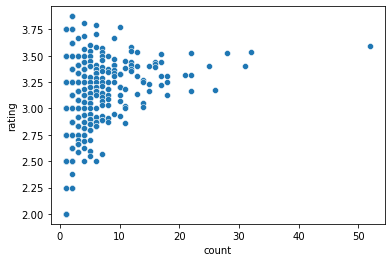

In [14]:
sns.scatterplot(x='count', y='rating', data=avg_rating_by_manufacturer)
plt.show()

In [15]:
regr_manufacturer = linear_model.LinearRegression()
train_x = np.asanyarray(avg_rating_by_manufacturer[['count']])
train_y = np.asanyarray(avg_rating_by_manufacturer[['rating']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01710006]]
Intercept:  [3.026315]


In [16]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

### TO DO 
- zrobić mapę świata ze średnią wartością rating i drugą z ilością czekolad heatmap i na tej podstawie stwierdzić czy faktycznie jedno zależy od drugiego
- połączyć kraj z kontynentem i sprawdzić jak to wychodzi


In [17]:
df_countries = pd.read_csv('countries of the world.csv', index_col=0)
df_countries.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [18]:
df_countries = df_countries.drop(df_countries.columns[1:], axis=1)
df_countries.head()

,Region
Country,
Afghanistan,ASIA (EX. NEAR EAST)
Albania,EASTERN EUROPE
Algeria,NORTHERN AFRICA
American Samoa,OCEANIA
Andorra,WESTERN EUROPE


In [19]:
df_countries = df_countries.reset_index()
df_countries.head()

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE


In [20]:
avg_rating_by_bean_origin = avg_rating_by_bean_origin.reset_index()
avg_rating_by_bean_origin.rename(columns={'country_of_bean_origin': 'Country'}, inplace=True)
avg_rating_by_bean_origin.merge(df_countries, on='Country')
avg_rating_by_bean_origin.head()

,Country,rating,count
0,Sao tome & principe,3.500000,1.0
1,Solomon islands,3.450000,10.0
2,Congo,3.318182,11.0
3,Thailand,3.300000,5.0
4,Cuba,3.291667,12.0


In [21]:
avg_rating_by_bean_origin.columns

Index(['Country', 'rating', 'count'], dtype='object')

In [22]:
set(avg_rating_by_bean_origin['Country'])

{'Australia',
 'Belize',
 'Blend',
 'Bolivia',
 'Bolvia',
 'Brazil',
 'Burma',
 'Cameroon',
 'Colombia',
 'Congo',
 'Costa rica',
 'Cuba',
 'Dominican republic',
 'Dr congo',
 'Ecuador',
 'El salvador',
 'Fiji',
 'Gabon',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Ivory coast',
 'Jamaica',
 'Liberia',
 'Madagascar',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Nicaragua',
 'Nigeria',
 'Panama',
 'Papua new guinea',
 'Peru',
 'Philippines',
 'Principe',
 'Puerto rico',
 'Samoa',
 'Sao tome',
 'Sao tome & principe',
 'Sierra leone',
 'Solomon islands',
 'Sri lanka',
 'St. lucia',
 'St.vincent-grenadines',
 'Sulawesi',
 'Sumatra',
 'Suriname',
 'Taiwan',
 'Tanzania',
 'Thailand',
 'Tobago',
 'Togo',
 'Trinidad',
 'U.s.a.',
 'Uganda',
 'Vanuatu',
 'Venezuela',
 'Vietnam'}

In [23]:
df_countries['Country'] = df_countries['Country'].str.strip()

In [24]:
set(df_countries['Country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia & Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Is.',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Repub. of the',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guian

In [25]:
len(set(avg_rating_by_bean_origin['Country']) - set(df_countries['Country']))

23

In [29]:
set(avg_rating_by_bean_origin['Country']) - set(df_countries['Country'])

{'Blend',
 'Congo',
 'Costa rica',
 'Dominican republic',
 'Dr congo',
 'El salvador',
 'Ivory coast',
 'Papua new guinea',
 'Principe',
 'Puerto rico',
 'Sao tome',
 'Sao tome & principe',
 'Sierra leone',
 'Solomon islands',
 'Sri lanka',
 'St. lucia',
 'St.vincent-grenadines',
 'Sulawesi',
 'Sumatra',
 'Tobago',
 'Trinidad',
 'U.s.a.'}

In [28]:
avg_rating_by_bean_origin.loc[avg_rating_by_bean_origin["Country"] == "Bolvia", "Country"] = 'Bolivia'

In [ ]:
avg_rating_by_bean_origin.loc[avg_rating_by_bean_origin["Country"] == "Congo", "Country"] = 'Congo, Dem. Rep.'
avg_rating_by_bean_origin.loc[avg_rating_by_bean_origin["Country"] == "Costa rica", "Country"] = 'Congo, Dem. Rep.'
avg_rating_by_bean_origin.loc[avg_rating_by_bean_origin["Country"] == "Dominican republic", "Country"] = 'Congo, Dem. Rep.'
avg_rating_by_bean_origin.loc[avg_rating_by_bean_origin["Country"] == "Dr congo", "Country"] = 'Congo, Dem. Rep.'


In [27]:
bean_merge = avg_rating_by_bean_origin.merge(df_countries, on='Country')
bean_merge.head()

,Country,rating,count,Region
0,Thailand,3.300000,5.0,ASIA (EX. NEAR EAST)
1,Cuba,3.291667,12.0,LATIN AMER. & CARIB
2,Guatemala,3.273585,53.0,LATIN AMER. & CARIB
3,Haiti,3.270833,24.0,LATIN AMER. & CARIB
4,Madagascar,3.264331,157.0,SUB-SAHARAN AFRICA


## Attempt to answer a question:
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

## Attempt to answer a question:
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

## SUMMARY